In [86]:
import torch
import torchfcn
import torchvision
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import fcn

In [87]:
# Assume the datasets are downloaded to the loc. below
root = osp.expanduser('~/data/datasets')

#### Some utility functions

In [88]:
def imshow(img):
    print(img.shape)
    plt.imshow(img)
    plt.show()
    
def hist(img):
    plt.hist(img)
    plt.show()

#### Explore the KITTI dataset

In [89]:
import PIL.Image

dataset_dir = osp.join(root, "CityScapes/KITTI/training")

def get_images(file_idx):
    img_file = osp.join(dataset_dir, "image_2/{0}.png".format(file_idx))
    img = PIL.Image.open(img_file)
    img = np.array(img, dtype=np.uint8)
    
    lbl_file = osp.join(dataset_dir, "semantic/{0}.png".format(file_idx))
    lbl = PIL.Image.open(lbl_file)
    lbl = np.array(lbl, dtype=np.int32)
    lbl[lbl == 255] = -1
    
    lbl_rgb_file = osp.join(dataset_dir, "semantic_rgb/{0}.png".format(file_idx))
    lbl_rgb = PIL.Image.open(lbl_rgb_file)
    lbl_rgb = np.array(lbl_rgb, dtype=np.uint8)
    return img, lbl, lbl_rgb

(375, 1242, 3)


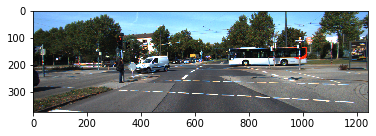

(375, 1242)


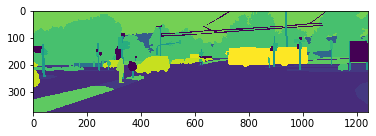

(375, 1242, 3)


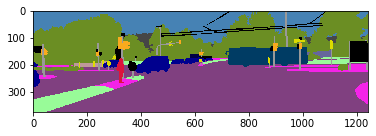

In [90]:
file_idx = "000016_10"
image, lbl, lbl_rgb = get_images(file_idx)
imshow(image)
imshow(lbl)
imshow(lbl_rgb)

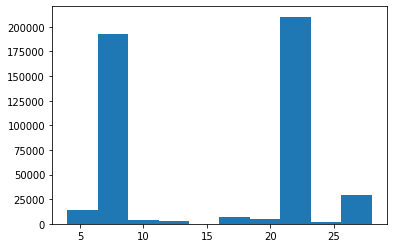

[[23 23 23 ... 23 23 23]
 [23 23 23 ... 23 23 23]
 [23 23 23 ... 23 23 23]
 ...
 [ 7 22 22 ...  7  7  7]
 [ 7 22 22 ...  7  7  7]
 [ 7 22 22 ...  7  7  7]]


In [91]:
label_dist = np.ravel(lbl)
hist(label_dist)
# Default threshold is 1000
# print(np.get_printoptions()['threshold'])
#np.set_printoptions(threshold=np.inf)
print(lbl)
#np.set_printoptions(threshold=1000)

#### Apply the mean (normalize) transform

In [92]:
mean_bgr = np.array([104.00698793, 116.66876762, 122.67891434])

def transform(input_img):
    #img = img[:, :, ::-1]  # RGB -> BGR
    input_img = input_img.astype(np.float64)
    input_img -= mean_bgr
    return input_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(375, 1242, 3)


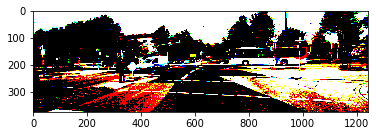

(375, 1242, 3)


In [93]:
transformed_image = transform(image)
imshow(transformed_image)
print(transformed_image.shape)

#### Explore the cityscapes dataset

In [94]:
import PIL.Image

dataset_dir = osp.join(root, "CityScapes/CityScapes")

def get_cityscapes_images(city, idx, id_suffix="000019"):
    img_prefix = "{0}/{1}/{2}/{2}_{3}_{4}_{0}".format("leftImg8bit", "train", city, idx, id_suffix)
    img_file = osp.join(dataset_dir, "{0}.png".format(img_prefix))
    img = PIL.Image.open(img_file)
    img = np.array(img, dtype=np.uint8) 
    
    file_prefix = "{0}/{1}/{2}/{2}_{3}_{4}_{0}".format("gtFine", "train", city, idx, id_suffix)
    
    lbl_file = osp.join(dataset_dir, "{0}_labelids.png".format(file_prefix))
    lbl = PIL.Image.open(lbl_file)
    lbl = np.array(lbl, dtype=np.int32)
    lbl[lbl == 255] = -1
    
    lbl_rgb_file = osp.join(dataset_dir,"{0}_color.png".format(file_prefix))
    lbl_rgb = PIL.Image.open(lbl_rgb_file)
    lbl_rgb = np.array(lbl_rgb, dtype=np.uint8)
    return img, lbl, lbl_rgb

(1024, 2048, 3)


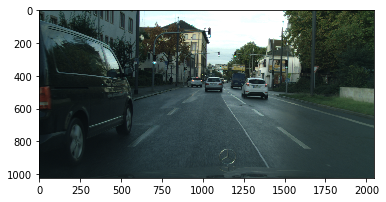

(1024, 2048)


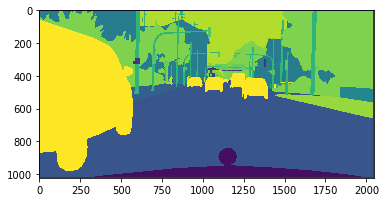

(1024, 2048, 4)


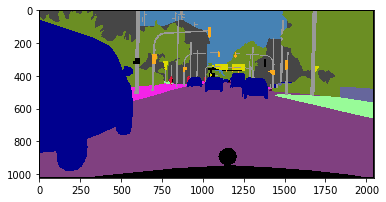

In [104]:
city = "darmstadt"
idx = "000032"

image, lbl, lbl_rgb = get_cityscapes_images(city, idx)

imshow(image)
imshow(lbl)
# Note: the number of channels is 4
imshow(lbl_rgb)


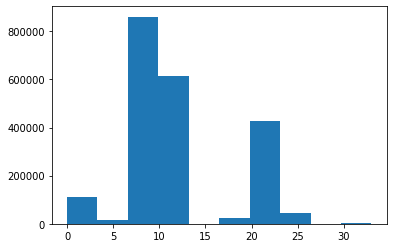

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
11


In [96]:
label_dist = np.ravel(lbl)
hist(label_dist)
print(lbl)
print(lbl[100][100])
